# Binomial Probability Distributions
**Further Reading**: §4.2 in Navidi (2015)

## Learning Objectives

After studying this notebook, completing the activities, engaging in class, and reading the book, you should be able to:

* Model scientific and engineering problems using the binomial distribution.

## Definition

The binomial distribution considers repeated "success" or "failure" experiments.

If a total of $n$ Bernoulli trials (see the [Bernoulli notebook](../09-publish/01-Bernoulli-Probability-Distribution.ipynb)) are conducted, and
* The trials are independent
* Each trial has the same success probability $p$
* $X$ is the number of successes in the $n$ trials

then $X$ has (follows) the binomial distribution with parameters $n$ and $p$, denoted $X \sim $ Bin($n,p$).

The binomial distribution as the probability mass function

$$p(x) = P(X = x) = \begin{cases}
               \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x} & x=0,1,...,n\\
               0 & \mathrm{otherwise}
            \end{cases}$$

Recall how to count combinations $n$ choose $x$:
    
$${n \choose x} = \frac{n!}{x!(n-x)!}$$

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 Explain to your neighbor the three parts of the binomial PMF. Why does it make sense that one of these parts counts combinations?
</div>

Using the definition for mean and variance and the binomial PMF, one derived the following formulae:

$$\mu_x = n p$$

$$\sigma_{X}^2 = np(1-p)$$

## Example: Flipping Three Coins

Let's start by enumerating all three possible outcomes for flipping 3 coins.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Study the code below. At this point in the semester, we will only walk through Python examples like the one below if there are questions. When you do your at home preparation, be sure to write down your questions in this notebook.
</div>

In [1]:
def enumerate_coin_flips(n,LOUD=True):
    '''Enumerate all possible outcomes of n coin flips
    
    Arg:
        n: number of coins to flip
        LOUD: print each flip to the screen
        
    Returns:
        summary: dictionary with value: number of heads (successes) and key: fraction of outcomes
    '''
    
    # set counter to 0
    i = 0
    
    # calculate number of total outcomes
    total = 2**n
    
    # initialize dictionary
    summary = {}
    for j in range(n+1):
        summary[j] = 0
    
    # start with all tails
    outcome = [False for j in range(n)]
    
    if LOUD:
        print("Enumerating all outcomes for",n,"flips of a fair coin.")
    
    while i < total:
        if LOUD:
            print(outcome)
        
        # count number of heads (Trues)
        num_heads = sum(outcome)
        
        # record in dictionary
        summary[num_heads] += 1
        
        # increment to next outcome
        keep_going = True
        k = 0
        while keep_going and k < n:
            # flip element k
            if outcome[k] is False:
                # flipped from False to True. We can stop.
                outcome[k] = True
                keep_going = False
            else:
                # flipped from True to False. We need to flip the next position too.
                outcome[k] = False
                k += 1
        
        # increment counter
        i += 1
    
    if LOUD:
        print(total," total outcomes")
    
    # normalize counts stored in `summary` by `total`
    for j in range(n+1):
        summary[j] = summary[j] / total
        
    return summary

In [2]:
enumerate_coin_flips(3)

Enumerating all outcomes for 3 flips of a fair coin.
[False, False, False]
[True, False, False]
[False, True, False]
[True, True, False]
[False, False, True]
[True, False, True]
[False, True, True]
[True, True, True]
8  total outcomes


{0: 0.125, 1: 0.375, 2: 0.375, 3: 0.125}

Notice our function `enumerate_coin_flips` returned a dictionary with the frequency of 0, 1, 2, and 3 heads. Let's see if the PMF for the binomial distribution matches these results.

In [3]:
import math

def nCr(n,r):
    ''' Calculates n choose r
    Args:
        n : total number of items to choose from
        r : number of items to choose
    
    Return:
        Total number of combinations, calculated with factorial formula
    
    '''
    f = math.factorial
    # Note: Using integer division, //, prevents overflow errors in Python 3
    return f(n) // f(r) // f(n-r)

def flip_coins(n,k,p):
    ''' Calculate probability of getting k heads in n coin flips
    n: total number of coin flips
    k: number of heads
    p: probability of success (head) for each event (coin flip)
    '''
    
    assert k <= n
    assert p <= 1.0
    assert p >= 0.0
    
    return nCr(n,k) * p**k * (1-p)**(n - k)

Let's test our function:
* Flip 3 coins
* Interested in the outcome of exactly 2 heads
* Let's use a fair coin: 50% chance for head or tails

In [4]:
flip_coins(3,2,0.5)

0.375

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Compute the probability of exactly 1 head when flipping 3 unfair coins that have a 70% chance of heads. Store your answer as a float in the Python variable <tt>ans_16d_1</tt>.
</div>

In [5]:
# Add your solution here

0.18900000000000003


In [6]:
# Removed autograder test. You may delete this cell.

Now let's plot the probability mass function.

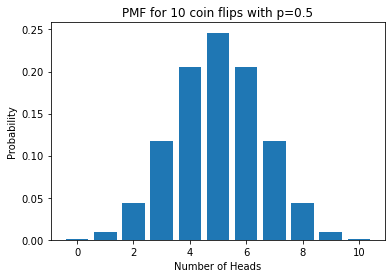

In [7]:
n = 10
p = 0.5
num_heads = []
prob = []
for k in range(n+1):
    num_heads.append(k)
    prob.append(flip_coins(n,k,p))
    
import matplotlib.pyplot as plt
plt.bar(num_heads,prob)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("PMF for " + str(n) + " coin flips with p=" + str(p))
plt.show()

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Write a sentence to predict how the PMF will change with an unfair coin that is more likely to land heads than tails.
</div>

**Home Activity Answer:** 

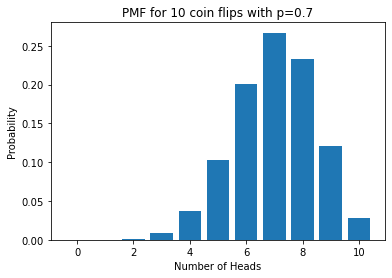

In [8]:
n = 10
p = 0.7
num_heads = []
prob = []
for k in range(n+1):
    num_heads.append(k)
    prob.append(flip_coins(n,k,p))
    
import matplotlib.pyplot as plt
plt.bar(num_heads,prob)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("PMF for " + str(n) + " coin flips with p=" + str(p))
plt.show()

Now let's use `num_heads` and `prob` from the previous code to plot the **cumulative distribution function** (CDF).

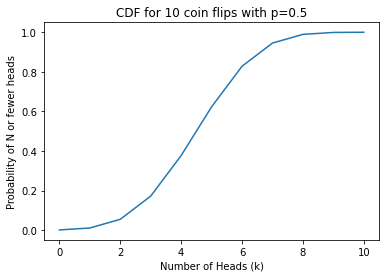

In [9]:
import numpy as np

# Reevaluate the PMF for a fair coin
n = 10
p = 0.5
num_heads = []
prob = []
for k in range(n+1):
    num_heads.append(k)
    prob.append(flip_coins(n,k,p))

# calculate cumulative sum
prob_cum_sum = np.cumsum(prob)

# Create the plot
import matplotlib.pyplot as plt
plt.plot(num_heads,prob_cum_sum)
plt.xlabel("Number of Heads (k)")
plt.ylabel("Probability of N or fewer heads")
plt.title("CDF for " + str(n) + " coin flips with p=" + str(p))
plt.show()